# I. Perkenalan

`Muhammad Sofyan Nurul Jamal`

## Dataset Description

Dataset berisi 2 folder: satu dengan data uji dan satu lagi dengan data kereta.

Rasio test-train-split adalah 0,14, dengan set data Test berisi 114 gambar dan set data Train berisi 711.

Gambar memiliki resolusi 240x240 piksel dalam model warna RGB.

Kedua folder berisi 3 kelas:

adidas
Berbicara
Nike

## Problem Statement

Kita akan Mencoba membuat Model Computer Vision yang mampu mengklasifikasi gambar model sepatu.

## Objective 

1. Mampu menjelaskan manfaat dari project yg dibuat terutama untuk bisnis.

2. Mampu mengevaluasi konsep Computer Vision / Natural Language Processing
- Mampu memahami konsep Computer Vision/NLP.
- Mampu mempersiapkan data untuk digunakan dalam model Computer Vision/NLP.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang dipilih.
- Mampu menganalisis dan menjelaskan performansi dari arsitektur Artificial Neural Network yang dibuat.

# II. Sumber Data Set



- [DATASET-Nike-Adidas-and-Converse](https://www.kaggle.com/datasets/die9origephit/nike-adidas-and-converse-imaged)


# III. Import Library

In [69]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(69)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score, accuracy_score

from pathlib import Path
!pip install -q jmd_imagescraper
from jmd_imagescraper.core import *
import glob
import os

Pertama-tama kita akan mengunduh file kaggle.json dari komputer lokal ke Google Colab. kaggle.json adalah file yang digunakan untuk mengotentikasi API Kaggle pada Google Colab.

Kode tersebut akan meminta pengguna untuk memilih file kaggle.json dari komputer lokal. Setelah file dipilih, kode akan mengunduh file kaggle.json ke folder .kaggle yang terletak di direktori pengguna pada Google Colab. Selanjutnya, kode akan mengatur izin file kaggle.json agar hanya dapat diakses oleh pengguna dan API Kaggle pada Google Colab.

Setelah itu, kode akan menampilkan daftar file dalam direktori .kaggle dan menampilkan informasi tentang file kaggle.json seperti izin akses dan ukuran file. Terakhir, kode akan menampilkan isi dari file kaggle.json.

In [2]:
from google.colab import files  # unduh file
!pip install -q kaggle
uploaded = files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json
total 4
-rw------- 1 root root 65 Apr  8 03:14 kaggle.json
{"username":"mohsofyan","key":"c755bdff10ceed6313d6fabe764de659"}

# IV. Data Loading

Selanjutnya disini kita akan mengunduh dan mengekstrak dataset "nike-adidas-and-converse-imaged" dari Kaggle .

In [3]:
!kaggle datasets download -d die9origephit/nike-adidas-and-converse-imaged
!unzip -q "/content/nike-adidas-and-converse-imaged.zip" -d /content/dataset

nike_files_test = glob.glob('/content/dataset/test/nike/*')
adidas_files_test = glob.glob('/content/dataset/test/adidas/*')
converse_files_test = glob.glob('/content/dataset/test/converse/*')


nike_files_train = glob.glob('/content/dataset/train/nike/*')
adidas_files_train = glob.glob('/content/dataset/train/adidas/*')
converse_files_train = glob.glob('/content/dataset/train/converse/*')

nike-adidas-and-converse-imaged.zip: Skipping, found more recently modified local copy (use --force to force download)
replace /content/dataset/test/adidas/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


# V. Exploratory Data Analysis (EDA)

In [76]:
print(f"Shape of Nike test image: {plt.imread(nike_files_test[0]).shape}")          #Bentuk data yang kita punya
print(f"Shape of Adidas test image: {plt.imread(adidas_files_test[0]).shape}")
print(f"Shape of Converse test image: {plt.imread(converse_files_test[0]).shape}")

print(f"Shape of Nike train image: {plt.imread(nike_files_train[0]).shape}")
print(f"Shape of Adidas train image: {plt.imread(adidas_files_train[0]).shape}")
print(f"Shape of Converse train image: {plt.imread(converse_files_train[0]).shape}")


Shape of Nike test image: (240, 240, 3)
Shape of Adidas test image: (240, 240, 3)
Shape of Converse test image: (240, 240, 3)
Shape of Nike train image: (240, 240, 3)
Shape of Adidas train image: (240, 240, 3)
Shape of Converse train image: (240, 240, 3)


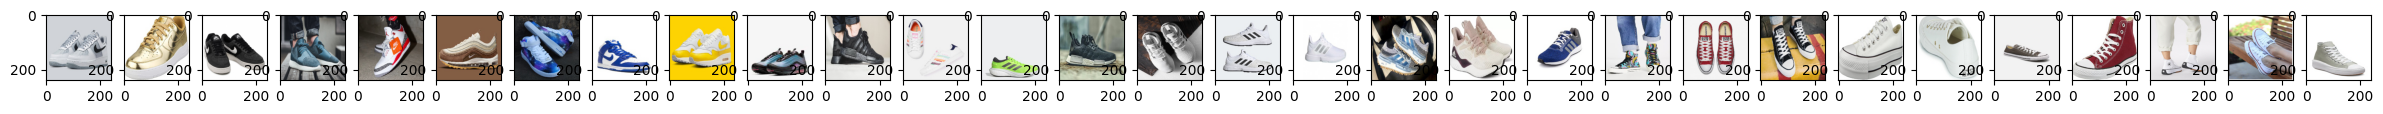

In [77]:
fig, ax = plt.subplots(ncols=30, figsize=(30,3)) # Visualisasi data test

for i in range(10):
    nike_test = plt.imread(nike_files_test[i])
    ax[i].imshow(nike_test)

for i in range(10):
    adidas_test = plt.imread(adidas_files_test[i])
    ax[10+i].imshow(adidas_test)

for i in range(10):
    converse_test = plt.imread(converse_files_test[i])
    ax[20+i].imshow(converse_test)


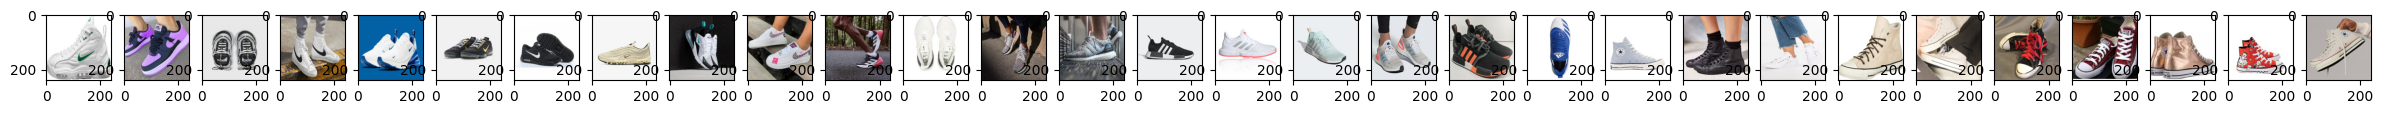

In [78]:
fig, ax = plt.subplots(ncols=30, figsize=(30,3)) # Visualisasi data train

for i in range(10):
    nike_train = plt.imread(nike_files_train[i])
    ax[i].imshow(nike_train)

for i in range(10):
    adidas_train = plt.imread(adidas_files_train[i])
    ax[10+i].imshow(adidas_train)

for i in range(10):
    converse_train = plt.imread(converse_files_train[i])
    ax[20+i].imshow(converse_train)

# Loading Image Data in Tensorflow

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*_Qs5j9GbBrL-eGflY2AKFQ.png"></img>

Sumber: [tds](https://towardsdatascience.com/what-is-the-best-input-pipeline-to-train-image-classification-models-with-tf-keras-eb3fe26d3cc5)

# VI. Feature Engineering

## Data Preprocessing

In [112]:
train_imgen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,validation_split=0.2)
test_imgen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)
train_ds = train_imgen.flow_from_directory('/content/dataset/train',
                                  target_size=(224, 224),
                                  batch_size=16,
                                  class_mode='categorical',
                                  subset='training',
                                  shuffle=False)

val_ds = train_imgen.flow_from_directory('/content/dataset/train',
                                  target_size=(224, 224),
                                  batch_size=16,
                                  class_mode='categorical',
                                  subset='validation',
                                  shuffle=False)

test_ds = test_imgen.flow_from_directory(
    '/content/dataset/test',
    target_size=(224, 224),
    batch_size=16,
    shuffle=False,
    seed=69,
    class_mode='categorical'
)


Found 570 images belonging to 3 classes.
Found 141 images belonging to 3 classes.
Found 114 images belonging to 3 classes.


In [102]:
train_ds

In [103]:
train_ds.next()

(array([[[[ 1.        ,  1.        ,  1.        ],
          [ 1.        ,  1.        ,  1.        ],
          [ 1.        ,  1.        ,  1.        ],
          ...,
          [ 1.        ,  1.        ,  1.        ],
          [ 1.        ,  1.        ,  1.        ],
          [ 1.        ,  1.        ,  1.        ]],
 
         [[ 1.        ,  1.        ,  1.        ],
          [ 1.        ,  1.        ,  1.        ],
          [ 1.        ,  1.        ,  1.        ],
          ...,
          [ 1.        ,  1.        ,  1.        ],
          [ 1.        ,  1.        ,  1.        ],
          [ 1.        ,  1.        ,  1.        ]],
 
         [[ 1.        ,  1.        ,  1.        ],
          [ 1.        ,  1.        ,  1.        ],
          [ 1.        ,  1.        ,  1.        ],
          ...,
          [ 1.        ,  1.        ,  1.        ],
          [ 1.        ,  1.        ,  1.        ],
          [ 1.        ,  1.        ,  1.        ]],
 
         ...,
 
         [[ 

In [114]:
train_ds.next()[0].shape

(16, 224, 224, 3)

In [115]:
val_ds.next()[0].shape

(16, 224, 224, 3)

In [116]:
train_ds.next()[0][0]

array([[[ 0.09803927,  0.02745104, -0.02745098],
        [ 0.05882359, -0.01176471, -0.06666666],
        [ 0.07450986,  0.00392163, -0.05098039],
        ...,
        [ 0.5764706 ,  0.5058824 ,  0.45098042],
        [ 0.5686275 ,  0.49803925,  0.4431373 ],
        [ 0.5372549 ,  0.4666667 ,  0.41176474]],

       [[ 0.05882359, -0.01176471, -0.06666666],
        [ 0.07450986,  0.00392163, -0.05098039],
        [ 0.10588241,  0.03529418, -0.01960784],
        ...,
        [ 0.56078434,  0.4901961 ,  0.43529415],
        [ 0.6       ,  0.5294118 ,  0.47450984],
        [ 0.6156863 ,  0.54509807,  0.4901961 ]],

       [[ 0.0196079 , -0.05098039, -0.10588235],
        [ 0.05098045, -0.01960784, -0.0745098 ],
        [ 0.09803927,  0.02745104, -0.02745098],
        ...,
        [ 0.54509807,  0.4901961 ,  0.427451  ],
        [ 0.5921569 ,  0.5372549 ,  0.47450984],
        [ 0.62352943,  0.5686275 ,  0.5058824 ]],

       ...,

       [[ 0.78039217,  0.77254903,  0.7411765 ],
        [ 0

In [117]:
test_ds

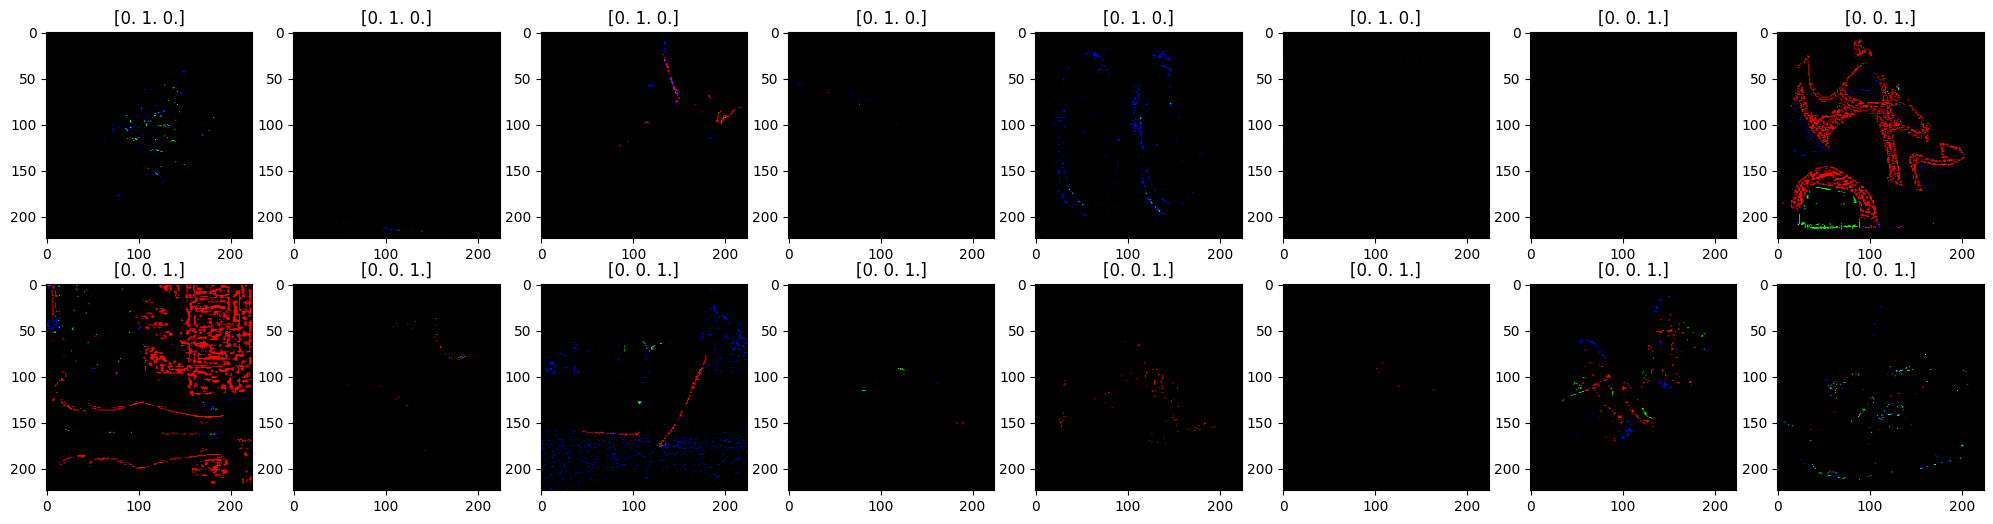

In [118]:
fig, ax = plt.subplots(nrows=2, ncols=8, figsize=(25,6)) # visualisasi train_ds
n = 0
for i in range(2):
    for j in range(8):
        img, label = train_ds.next()
        img = img[n].astype('uint8')
        ax[i][j].imshow(img)
        ax[i][j].set_title(label[n])
        n += 1


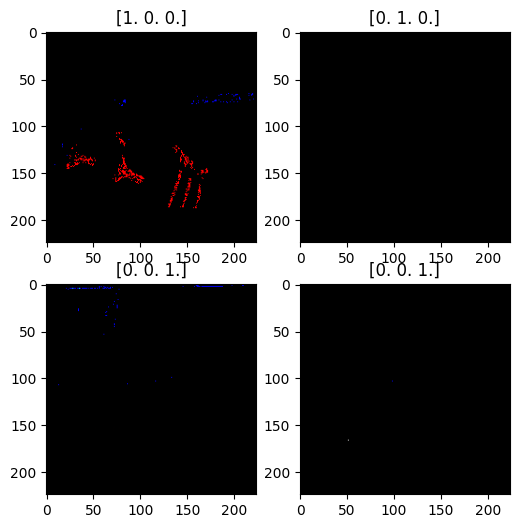

In [119]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(6,6)) # visualisasi test_ds
n=0
for i in range(2):
  for j in range(2):
    img = val_ds.next()[0][n].astype('uint8')
    ax[i][j].imshow(img)
    ax[i][j].set_title(val_ds.next()[1][n])
    n+=1

## Data Augmentation

In [110]:
# defining the data augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
])

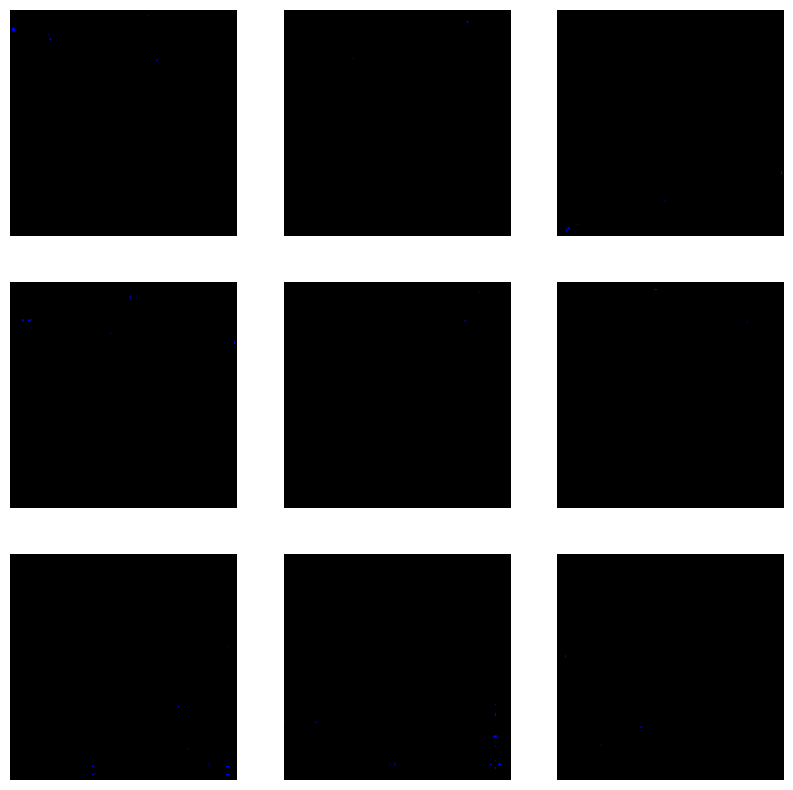

In [120]:
# mengambil batch pertama dari train_ds dengan next()
images, _ = next(train_ds)

# menampilkan 9 gambar hasil augmentasi
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis('off')
plt.show()

# VII. Model Definition

MobileNetV2 adalah arsitektur jaringan saraf tiruan (deep neural network) yang dikembangkan untuk mengoptimalkan performa klasifikasi gambar pada perangkat seluler dengan sumber daya terbatas seperti smartphone. Arsitektur ini dirancang dengan menggunakan teknik-teknik seperti depthwise separable convolution, linear bottleneck, dan shortcut connection, sehingga mampu menghasilkan model dengan jumlah parameter yang lebih kecil tanpa mengorbankan akurasi. MobileNetV2 juga memiliki performa yang baik dalam mempercepat waktu pelatihan dan inferensi model. Arsitektur ini telah terbukti sukses dalam berbagai aplikasi pengolahan citra seperti deteksi objek, segmentasi gambar, dan klasifikasi gambar.

MobileNetV2 dipilih karena memiliki arsitektur yang ringan dan efisien sehingga cocok untuk aplikasi pada perangkat mobile dan embedded devices dengan resource terbatas. Arsitektur ini juga terbukti menghasilkan performa yang baik dalam tugas-tugas pengolahan citra seperti klasifikasi gambar. Selain itu, MobileNetV2 telah dilatih dengan dataset yang cukup besar dan beragam sehingga mampu mengenali objek dari berbagai merek sepatu. Dengan demikian, MobileNetV2 adalah pilihan yang tepat untuk kasus ini karena memiliki balance antara performa dan penggunaan resource yang efisien.

Kelebihan dari MobileNetV2 antara lain:

- Lebih ringan dan cepat dibandingkan dengan arsitektur model deep learning lainnya, sehingga cocok digunakan pada perangkat mobile dan edge device dengan sumber daya yang terbatas.
Akurasi model cukup baik dibandingkan dengan model deep learning lainnya.
Dapat diatur dan disesuaikan dengan kebutuhan, seperti arsitektur model, berapa banyak parameter, dan tingkat kompresi gambar.

Kekurangan dari MobileNetV2 antara lain:

- Tidak dapat memproses gambar dengan detail yang terlalu rumit, karena memiliki arsitektur yang lebih sederhana dibandingkan dengan model deep learning lainnya.
Lebih mudah mengalami overfitting, terutama jika jumlah data training yang terbatas.
Performa model dapat dipengaruhi oleh kecepatan dan kualitas koneksi internet yang digunakan saat melakukan training dan inferensi.

# VIII. Model Training

## MobileNetV2 

Disini kita memuat model MobileNetV2 dari Keras Applications, dimana kita menentukan input shape dari gambar yang akan diproses, yaitu (224, 224, 3), yang berarti gambar memiliki resolusi 224x224 dan 3 channel warna (RGB). Kemudian kita menentukan include_top=False, yang berarti kita tidak ingin memuat bagian akhir dari model (fully connected layer) karena kita akan menambahkan layer sendiri. Selanjutnya kita menggunakan weights='imagenet' untuk memuat parameter-parameter dari model MobileNetV2 yang telah dilatih pada dataset ImageNet, yang akan mempercepat waktu pelatihan model kita. Terakhir kita menentukan pooling='avg', yang akan menjadikan output dari model kita menjadi global average pooling.

Selanjutnya, kita mengatur model menjadi tidak terlatih dengan menetapkan trainable = False, hal ini karena kita ingin menggunakan parameter-parameter yang sudah dilatih oleh model MobileNetV2, tanpa memperbarui nilai-nilainya saat melatih model kita pada dataset kita sendiri.

In [17]:
mnv2_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

mnv2_model.trainable = False

Selanjutnya kita menginisialisasi MobileNetV2 dengan menggunakan pre-trained weight dari dataset imagenet dan mengatur input shape menjadi (224, 224, 3) untuk input gambar berukuran 224x224 dengan 3 channel warna (RGB). Selanjutnya, kita membuat sebuah sequential model yang terdiri dari base model MobileNetV2, diikuti oleh 2 layer dense yang memiliki fungsi aktivasi relu dan dropout rate sebesar 0.2. Layer terakhir merupakan output layer dengan 3 neuron yang merepresentasikan kelas yang berbeda (adidas, nike, convers) dan fungsi aktivasi softmax untuk menghasilkan probabilitas output kelas.

Dengan menggunakan pre-trained weight dari MobileNetV2, model ini dapat menghasilkan performa yang baik dengan jumlah parameter yang lebih sedikit dibandingkan dengan membuat model dari awal. Hal ini karena MobileNetV2 telah dilatih pada dataset besar dan beragam sehingga telah belajar fitur yang umum pada gambar yang dapat digunakan pada dataset kita. Selain itu, dengan menambahkan layer dense dan dropout, kita dapat mengatur model agar dapat mengenali fitur-fitur yang spesifik pada dataset kita dan menghindari overfitting.

Namun, kelemahan dari model ini adalah penggunaan MobileNetV2 sebagai base model membuat kita terbatas dalam mengubah arsitektur dari base model tersebut. Jadi, jika dataset kita memiliki karakteristik yang berbeda dengan dataset imagenet, model ini mungkin tidak dapat mengenali fitur-fitur yang spesifik pada dataset kita secara optimal.

In [18]:
model_m1 = tf.keras.Sequential([
    mnv2_model,
    # Layer fully connected pertama dengan 512 neuron dan fungsi aktivasi relu
    tf.keras.layers.Dense(512, activation='relu'),
    # Layer dropout untuk mengurangi overfitting
    tf.keras.layers.Dropout(0.2),
    # Layer fully connected kedua dengan 128 neuron dan fungsi aktivasi relu
     tf.keras.layers.Dense(128, activation='relu'),
    # Layer output dengan 3 neuron (kelas) dan fungsi aktivasi softmax
    tf.keras.layers.Dense(3, activation='softmax')])

In [19]:
model_m1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 2,979,907
Trainable params: 721,923
Non-trainable params: 2,257,984
______________________________________

Dari hasil output summary yang diberikan, kita dapat melihat bahwa model_m1 adalah sebuah sequential model dengan 5 layer. Layer pertama adalah pre-trained MobileNetV2 model yang diatur agar tidak dapat di-training kembali dengan menggunakan parameter trainable=False. Layer ini menghasilkan output berupa fitur dengan dimensi 1280.

Selanjutnya, terdapat dua layer dense (fully connected layer) dengan masing-masing 512 dan 128 neuron, serta dropout layer dengan nilai dropout sebesar 0.2. Lapisan-lapisan ini ditambahkan untuk membantu model mempelajari pola-pola yang lebih kompleks dari fitur yang dihasilkan oleh MobileNetV2.

Terakhir, layer output yang merupakan dense layer dengan 3 neuron (jumlah kelas) dan menggunakan fungsi aktivasi softmax untuk menghasilkan probabilitas kelas-kelas yang mungkin. Total parameter model ini sebanyak 2,979,907, dengan parameter yang dapat dilatih (trainable parameter) sebanyak 721,923 dan parameter yang tidak dapat dilatih (non-trainable parameter) sebanyak 2,257,984 yang berasal dari MobileNetV2 pre-trained model.

Kemudian kita mendefinisikan konfigurasi pelatihan untuk model kita. Konfigurasi pelatihan meliputi optimizer, fungsi loss, dan metrik yang akan dipantau selama pelatihan model.

- Optimizer: kita menggunakan Adam optimizer yang merupakan optimizer populer untuk deep learning karena memiliki kemampuan untuk menyesuaikan laju pembelajaran untuk setiap parameter secara adaptif.

- Loss function: kita menggunakan categorical crossentropy sebagai fungsi loss karena tugas kita adalah klasifikasi multi-kelas.

- Metrics: kita memantau akurasi selama pelatihan dengan 'accuracy'.Matriks akurasi menjadi salah satu metrik yang paling umum digunakan dalam masalah klasifikasi karena memberikan informasi yang cukup untuk mengevaluasi kinerja model secara umum. Dalam kasus ini, kita menggunakan matriks akurasi sebagai metrik untuk mengevaluasi model karena kita ingin tahu seberapa baik model dapat mengklasifikasikan gambar-gambar sepatu ke dalam tiga kelas yang berbeda.

In [20]:
# Define Training Configuration (Optimizer, Loss, Metrics)

model_m1.compile(
    # Optimizer
    optimizer=tf.keras.optimizers.Adam(),
    
    # Loss function to minimize
    loss='categorical_crossentropy', 
    
    # List of metrics to monitor
    metrics=['accuracy']
)


Selanjutnya kita menggunakan callback EarlyStopping dalam TensorFlow Keras. Callback EarlyStopping digunakan untuk menghentikan pelatihan (training) saat model sudah tidak menunjukkan peningkatan dalam metrik evaluasi yang dipantau (monitor) selama beberapa epoch yang ditentukan (patience). Pada kode di atas, callback EarlyStopping diterapkan dengan memantau metrik 'val_loss' (loss pada data validasi) dan menghentikan pelatihan setelah 5 epoch tanpa perbaikan.

Callback ini sangat berguna dalam menghindari overfitting dan mempercepat waktu pelatihan dengan menghentikan pelatihan sejak dini ketika model sudah tidak lagi menunjukkan peningkatan kinerja pada data validasi.

In [21]:
# setting callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [22]:
# training model
history_m1 = model_m1.fit(train_ds,epochs=50,validation_data=val_ds,callbacks=[callback])

Epoch 1/50
36/36 [==============================] - 38s 954ms/step - loss: 1.8751 - accuracy: 0.2807 - val_loss: 1.1708 - val_accuracy: 0.3333
Epoch 2/50
36/36 [==============================] - 28s 771ms/step - loss: 1.0922 - accuracy: 0.3842 - val_loss: 1.0258 - val_accuracy: 0.5461
Epoch 3/50
36/36 [==============================] - 30s 825ms/step - loss: 0.9985 - accuracy: 0.5140 - val_loss: 1.0163 - val_accuracy: 0.3475
Epoch 4/50
36/36 [==============================] - 40s 1s/step - loss: 0.9871 - accuracy: 0.4947 - val_loss: 0.9209 - val_accuracy: 0.4894
Epoch 5/50
36/36 [==============================] - 35s 964ms/step - loss: 0.7177 - accuracy: 0.6930 - val_loss: 0.8373 - val_accuracy: 0.5745
Epoch 6/50
36/36 [==============================] - 28s 793ms/step - loss: 0.6524 - accuracy: 0.6965 - val_loss: 0.7425 - val_accuracy: 0.6667
Epoch 7/50
36/36 [==============================] - 28s 784ms/step - loss: 0.4719 - accuracy: 0.8035 - val_loss: 0.5954 - val_accuracy: 0.7305
Ep

sekilas dari pengamatan kami :

Model menggunakan metrik akurasi (accuracy) sebagai ukuran performa pada setiap epoch.
- Pada epoch 1, nilai akurasi pada data training hanya sekitar 0.28 sedangkan pada data validasi sekitar 0.33. Hal ini menunjukkan bahwa model awalnya memiliki performa yang kurang baik pada kedua set data.

- Selanjutnya, pada epoch 2, nilai akurasi pada data training meningkat menjadi sekitar 0.38, sedangkan pada data validasi naik signifikan menjadi sekitar 0.54. Namun, pada epoch 3, performa pada data validasi menurun drastis menjadi sekitar 0.34, sementara performa pada data training sedikit meningkat.

- Pada epoch selanjutnya (epoch 4-15), model terus meningkatkan performa pada kedua set data dengan terjadinya fluktuasi pada nilai loss dan akurasi. Pada epoch terakhir, model memiliki nilai akurasi sekitar 0.98 pada data training dan sekitar 0.79 pada data validasi.

- Meskipun terjadi overfitting (nilai akurasi pada data training jauh lebih tinggi dari data validasi), tetapi performa model secara keseluruhan meningkat dari epoch ke epoch.

# IX. Model Evaluation

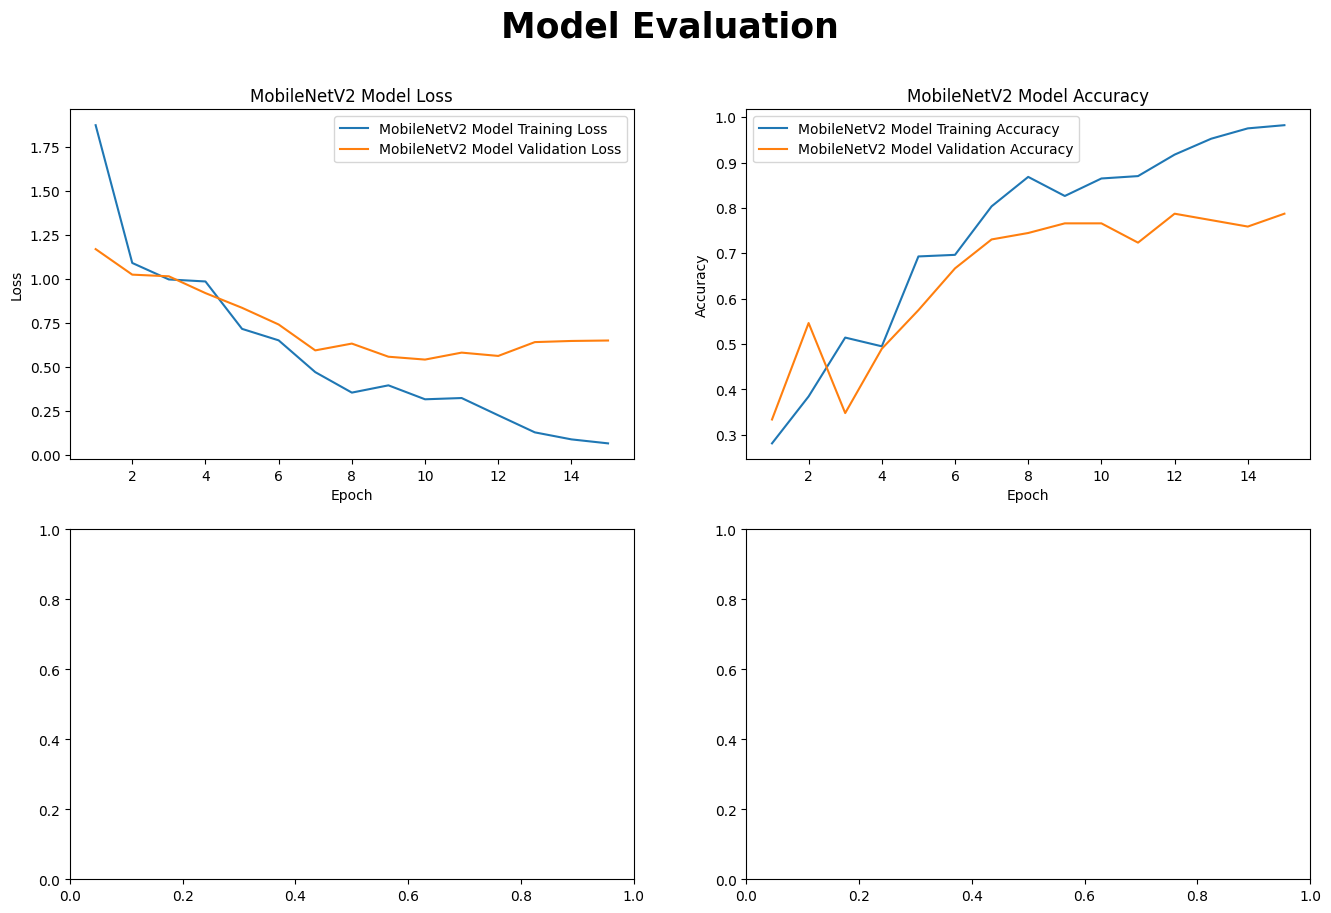

In [25]:
epoch=15

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,10))
fig.suptitle('Model Evaluation', fontsize=25, weight='bold')


# plotting MobileNetV2 model loss
ax[0,0].plot(range(1,epoch+1),history_m1.history['loss'],label='MobileNetV2 Model Training Loss')
ax[0,0].plot(range(1,epoch+1),history_m1.history['val_loss'],label='MobileNetV2 Model Validation Loss')
ax[0,0].set_title('MobileNetV2 Model Loss')
ax[0,0].legend()
ax[0,0].set_xlabel('Epoch')
ax[0,0].set_ylabel('Loss')

# plotting MobileNetV2 model accuracy
ax[0,1].plot(range(1,epoch+1),history_m1.history['accuracy'],label='MobileNetV2 Model Training Accuracy')
ax[0,1].plot(range(1,epoch+1),history_m1.history['val_accuracy'],label='MobileNetV2 Model Validation Accuracy')
ax[0,1].set_title('MobileNetV2 Model Accuracy')
ax[0,1].legend()
ax[0,1].set_xlabel('Epoch')
ax[0,1].set_ylabel('Accuracy')

plt.show()


Pada grafik tersebut terlihat hasil evaluasi dari model yang menggunakan arsitektur MobileNetV2 pada epoch ke-15 dengan membandingkan antara training loss dan validation loss pada grafik pertama dan training accuracy dan validation accuracy pada grafik kedua.

Dari grafik pertama, dapat dilihat bahwa training loss menurun secara signifikan pada setiap epoch, hal ini menunjukkan bahwa model semakin mampu dalam meminimalkan error pada data training. Sedangkan validation loss pada awalnya juga menurun namun cenderung stagnan setelah beberapa epoch, hal ini bisa menunjukkan bahwa model sudah mencapai titik optimalnya pada data validasi dan selanjutnya perlu diobservasi lebih lanjut.

Sedangkan pada grafik kedua, dapat dilihat bahwa training accuracy meningkat seiring dengan bertambahnya epoch, yang menunjukkan bahwa model mampu mengenali pola pada data training dengan semakin baik. Sedangkan validation accuracy awalnya meningkat secara signifikan namun menurun sedikit setelah beberapa epoch, hal ini bisa menunjukkan model overfitting pada data training sehingga tidak mampu mengenali pola yang baru pada data validasi.

Secara keseluruhan, hasil evaluasi pada epoch ke-15 menunjukkan model yang semakin baik dalam meminimalkan error pada data training dan semakin mampu mengenali pola pada data training, namun perlu diperhatikan terkait overfitting pada data validasi. Oleh karena itu, perlu dilakukan observasi lebih lanjut pada model untuk meningkatkan performa pada data validasi.

## Test Dataset

In [65]:
# Evaluate the model on the train set
results = model_m1.evaluate(train_ds)
print("Train loss:", results[0])
print("Train accuracy:", results[1])

# Evaluate the model on the test set
results = model_m1.evaluate(test_ds)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

36/36 [==============================] - 23s 638ms/step - loss: 0.0294 - accuracy: 0.9965
Train loss: 0.02936267852783203
Train accuracy: 0.9964912533760071
8/8 [==============================] - 4s 469ms/step - loss: 0.8226 - accuracy: 0.7193
Test loss: 0.8225518465042114
Test accuracy: 0.719298243522644


Model yang dievaluasi menggunakan metrik Loss dan Accuracy pada set data train dan test. Model memiliki train accuracy yang cukup tinggi yaitu 99.65%, sedangkan test accuracy sedikit lebih rendah yaitu sebesar 71.93%. Gap antara train dan test accuracy cukup besar, yang mengindikasikan kemungkinan adanya overfitting pada model.

In [64]:
# MobileNetV2 prediction
prob = model_m1.predict(test_ds)
predictions = np.argmax(prob, axis=1)

# Get the true labels from the test set
true_labels = test_ds.labels

# Print Classification report
print(classification_report(true_labels, predictions))

# Print the AUC score
print('AUC Score:',roc_auc_score(true_labels, prob, multi_class='ovr'))

8/8 [==============================] - 7s 914ms/step
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        38
           1       0.77      0.79      0.78        38
           2       0.70      0.61      0.65        38

    accuracy                           0.72       114
   macro avg       0.72      0.72      0.72       114
weighted avg       0.72      0.72      0.72       114

AUC Score: 0.9044321329639889


Berdasarkan output tersebut, kita dapat menyimpulkan bahwa model memiliki akurasi sebesar 71,93%, yang berarti model benar dalam mengklasifikasikan gambar-gambar pada set data uji sebesar 71,93%. Kita juga dapat melihat precision, recall, dan f1-score untuk setiap kelas. Hasil tersebut menunjukkan bahwa model mampu memprediksi kelas 1 dengan baik (f1-score sebesar 0.78), tetapi masih memiliki sedikit kesulitan dalam memprediksi kelas 0 dan 2 (f1-score masing-masing sebesar 0.72 dan 0.65).

Selain akurasi dan f1-score, kita juga dapat melihat bahwa AUC score sebesar 0.9044, yang cukup tinggi dan menunjukkan bahwa model mampu membedakan antara kelas-kelas dengan baik. Hal ini menunjukkan bahwa model memiliki kinerja yang baik dalam memprediksi label kelas pada data uji.

## confusion matrix

8/8 [==============================] - 6s 753ms/step


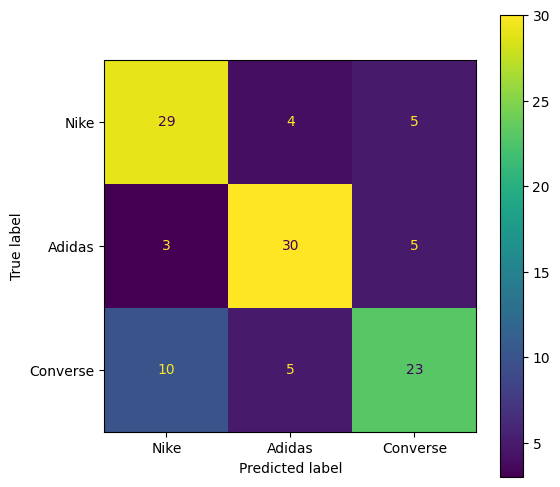

In [125]:
# MobileNetV2 prediction
prob = model_m1.predict(test_ds)
predictions = np.argmax(prob, axis=1)

# Get the true labels from the test set
true_labels = test_ds.labels

# Create confusion matrix
cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Nike', 'Adidas', 'Converse'])
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax)
plt.show()

## Model Improvement

Selanjutnya kita akan mengimprove model kita dengan menggunakan optimizer adamax. 

Adamax merupakan salah satu algoritma optimisasi yang digunakan dalam training deep learning. Algoritma ini merupakan variasi dari algoritma Adam yang pada dasarnya menggabungkan algoritma RMSProp dan algoritma momentum. Adamax bekerja dengan mempertimbangkan momentum (yang memungkinkan pengalaman masa lalu diperhitungkan dalam perhitungan gradien saat ini) dan perhitungan moving average dari gradien (yang memungkinkan penyesuaian laju pembelajaran berdasarkan seberapa cepat atau lambat model belajar dari data). Adamax sering digunakan pada model deep learning karena kinerjanya yang lebih cepat dan efektif dalam menemukan minimum global.

Alasan kami memilih optimizer Adamax adalah:

- Performa yang baik: Secara umum, Adamax dikenal memiliki performa yang baik dalam banyak kasus penggunaan, khususnya pada data yang memiliki banyak dimensi atau fitur.

- Kecepatan training: Dibandingkan dengan optimizer lainnya, Adamax cenderung lebih cepat dalam melakukan training pada model deep learning.

- Skalabilitas: Adamax dapat digunakan pada berbagai jenis model deep learning, termasuk yang kompleks, dan skala data yang besar.

- Kemudahan implementasi: Adamax mudah diimplementasikan pada model deep learning dengan menggunakan banyak kerangka kerja seperti TensorFlow, Keras, dan PyTorch.



In [28]:
# Improved Model Architecture

model_m2 = tf.keras.Sequential([
    mnv2_model,
    # Layer fully connected pertama dengan 512 neuron dan fungsi aktivasi relu
    tf.keras.layers.Dense(512, activation='relu'),
    # Layer dropout untuk mengurangi overfitting
    tf.keras.layers.Dropout(0.2),
    # Layer fully connected kedua dengan 128 neuron dan fungsi aktivasi relu
     tf.keras.layers.Dense(128, activation='relu'),
    # Layer output dengan 3 neuron (kelas) dan fungsi aktivasi softmax
    tf.keras.layers.Dense(3, activation='softmax')])

In [29]:
model_m2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense_3 (Dense)             (None, 512)               655872    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 2,979,907
Trainable params: 721,923
Non-trainable params: 2,257,984
______________________________________

In [30]:
# Define Training Configuration (Optimizer, Loss, Metrics)

model_m2.compile(
    # Optimizer
    optimizer=tf.keras.optimizers.Adamax(),
    
    # Loss function to minimize
    loss='categorical_crossentropy', 
    
    # List of metrics to monitor
    metrics=['accuracy']
)

In [31]:
# setting callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [32]:
# training model
history_m2 = model_m2.fit(train_ds,epochs=50,validation_data=val_ds,callbacks=[callback])

Epoch 1/50
36/36 [==============================] - 33s 792ms/step - loss: 1.6238 - accuracy: 0.2877 - val_loss: 1.0906 - val_accuracy: 0.3404
Epoch 2/50
36/36 [==============================] - 33s 922ms/step - loss: 1.0649 - accuracy: 0.4772 - val_loss: 0.9243 - val_accuracy: 0.6950
Epoch 3/50
36/36 [==============================] - 28s 770ms/step - loss: 0.8808 - accuracy: 0.6316 - val_loss: 0.8372 - val_accuracy: 0.6312
Epoch 4/50
36/36 [==============================] - 27s 757ms/step - loss: 0.7262 - accuracy: 0.6895 - val_loss: 0.7957 - val_accuracy: 0.6383
Epoch 5/50
36/36 [==============================] - 32s 908ms/step - loss: 0.6644 - accuracy: 0.6965 - val_loss: 0.6945 - val_accuracy: 0.7021
Epoch 6/50
36/36 [==============================] - 31s 882ms/step - loss: 0.5613 - accuracy: 0.8000 - val_loss: 0.6901 - val_accuracy: 0.6667
Epoch 7/50
36/36 [==============================] - 27s 765ms/step - loss: 0.5219 - accuracy: 0.8000 - val_loss: 0.7232 - val_accuracy: 0.6738

Mterlihat model dilatih dengan 50 epoch. Dari log training tersebut, dapat dilihat bahwa pada awalnya, model mengalami kesulitan untuk mempelajari pola yang ada pada dataset, terbukti dengan rendahnya akurasi pada epoch pertama yaitu hanya 28.77%. Namun, seiring dengan bertambahnya epoch, akurasi dari model meningkat secara signifikan hingga mencapai akurasi terbaik sebesar 96.84% pada epoch ke-16.

Pada akhir pelatihan, model memiliki akurasi sebesar 96.84% pada data pelatihan dan 76.60% pada data validasi. Terdapat perbedaan yang cukup signifikan antara akurasi pada data pelatihan dan data validasi, yang menandakan terjadinya overfitting. 

## Improved Model Evaluation

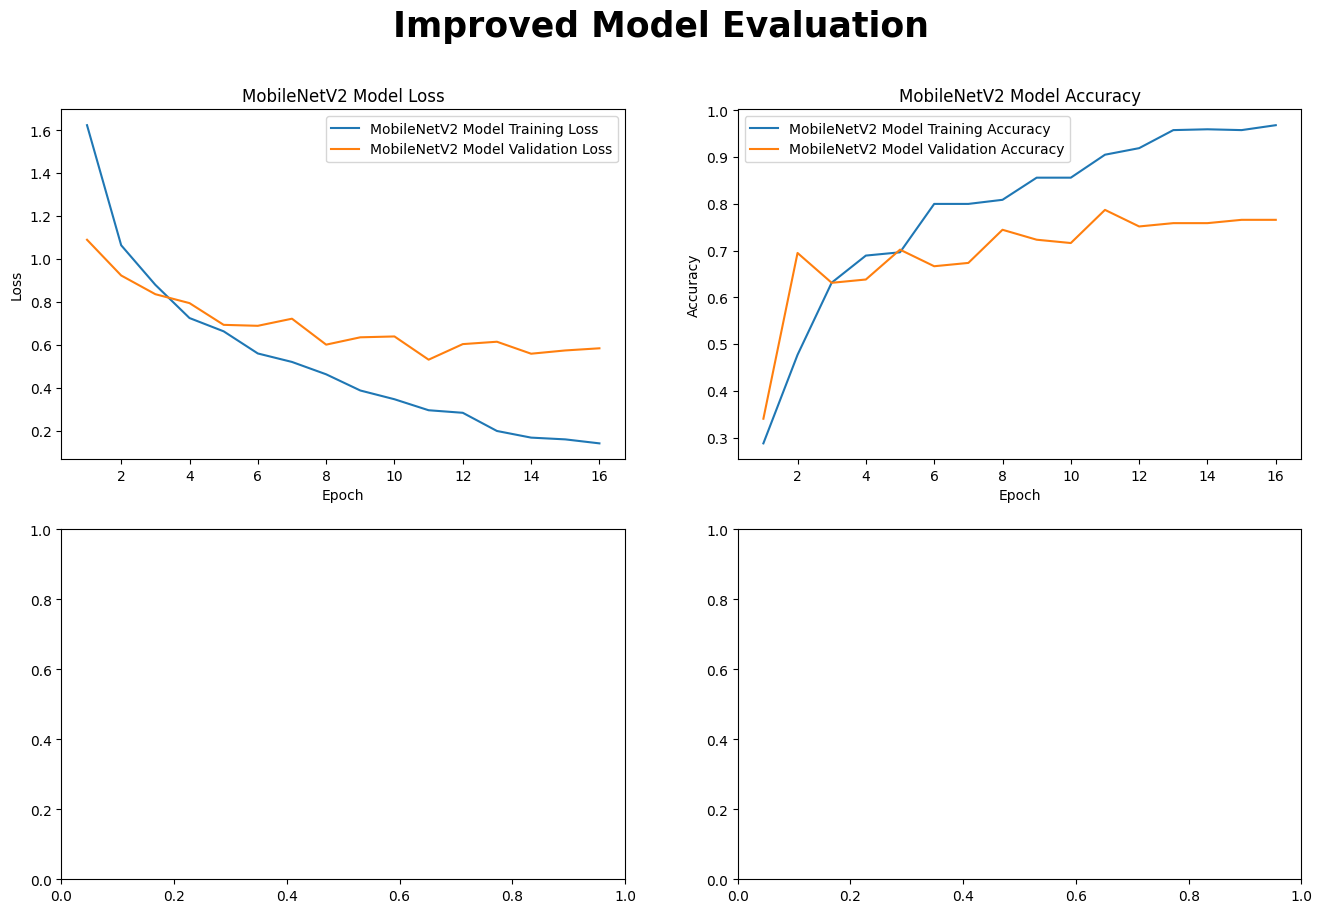

In [33]:
epoch=16

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,10))
fig.suptitle('Improved Model Evaluation', fontsize=25, weight='bold')


# plotting MobileNetV2 model loss
ax[0,0].plot(range(1,epoch+1),history_m2.history['loss'],label='MobileNetV2 Model Training Loss')
ax[0,0].plot(range(1,epoch+1),history_m2.history['val_loss'],label='MobileNetV2 Model Validation Loss')
ax[0,0].set_title('MobileNetV2 Model Loss')
ax[0,0].legend()
ax[0,0].set_xlabel('Epoch')
ax[0,0].set_ylabel('Loss')

# plotting MobileNetV2 model accuracy
ax[0,1].plot(range(1,epoch+1),history_m2.history['accuracy'],label='MobileNetV2 Model Training Accuracy')
ax[0,1].plot(range(1,epoch+1),history_m2.history['val_accuracy'],label='MobileNetV2 Model Validation Accuracy')
ax[0,1].set_title('MobileNetV2 Model Accuracy')
ax[0,1].legend()
ax[0,1].set_xlabel('Epoch')
ax[0,1].set_ylabel('Accuracy')

plt.show()


## Improvement Test Dataset

In [66]:
# Evaluate the model on the train set
results = model_m2.evaluate(train_ds)
print("Train loss:", results[0])
print("Train accuracy:", results[1])

# Evaluate the model on the test set
results = model_m2.evaluate(test_ds)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

36/36 [==============================] - 22s 600ms/step - loss: 0.1119 - accuracy: 0.9789
Train loss: 0.11187347024679184
Train accuracy: 0.9789473414421082
8/8 [==============================] - 4s 524ms/step - loss: 0.6679 - accuracy: 0.7719
Test loss: 0.6678853631019592
Test accuracy: 0.7719298005104065


Model yang dilatih memiliki 50 epoch dengan menggunakan dataset training dan validation. Hasil akhir training menunjukkan loss sebesar 0.1119 dan akurasi sebesar 0.9789. Hasil akurasi yang cukup tinggi menunjukkan bahwa model dapat mempelajari pola dengan baik dari dataset training.

Namun, pada dataset testing, model memiliki loss sebesar 0.6679 dan akurasi sebesar 0.7719, yang menunjukkan ada overfitting. Model terlalu fokus pada dataset training dan gagal melakukan generalisasi dengan baik pada dataset testing.

In [67]:
# MobileNetV2 prediction
prob = model_m2.predict(test_ds)
predictions = np.argmax(prob, axis=1)

# Get the true labels from the test set
true_labels = test_ds.labels

# Print Classification report
print(classification_report(true_labels, predictions))

# Print the AUC score
print('AUC Score:',roc_auc_score(true_labels, prob, multi_class='ovr'))

8/8 [==============================] - 6s 629ms/step
              precision    recall  f1-score   support

           0       0.69      0.89      0.78        38
           1       0.79      0.87      0.82        38
           2       0.91      0.55      0.69        38

    accuracy                           0.77       114
   macro avg       0.80      0.77      0.77       114
weighted avg       0.80      0.77      0.77       114

AUC Score: 0.9120498614958449


Setelah dilakukan pengembangan, train accuracy sedikit menurun menjadi 97.89% namun test accuracy meningkat menjadi 77.19%. Hal ini menunjukkan bahwa pengembangan model berhasil meningkatkan performa model dan mengurangi overfitting pada data train.

Dari hasil analisis sebelum dan sesudah dilakukan pengembangan model, terdapat beberapa perbedaan pada performa model. Sebelum pengembangan, model memiliki train accuracy yang sangat tinggi (99.65%) namun test accuracy yang rendah (71.93%). Hal ini menunjukkan model mengalami overfitting pada data train dan tidak dapat mengeneralisasi dengan baik pada data test.

Setelah dilakukan pengembangan, train accuracy sedikit menurun menjadi 97.89% namun test accuracy meningkat menjadi 77.19%. Hal ini menunjukkan bahwa pengembangan model berhasil meningkatkan performa model dan mengurangi overfitting pada data train. Selain itu, terdapat peningkatan pada precision, recall, dan f1-score pada label 0 dan 1, sementara label 2 mengalami penurunan.

Namun, meskipun terdapat peningkatan performa pada model setelah dilakukan pengembangan, nilai AUC tidak mengalami perubahan yang signifikan.


Dari sini kami memutuskan untuk mengguanakan model after tuning.

# X. Model Saving

In [74]:
model_m2.save('model.h5')

# XI. Model Inference

Model inference dapat dilihat pada notebook kami yang bernama 'h8dsft_P2M2_Inferensial_Sofyan.ipynb'

# XII. Kesimpulan 

Dari pararan data data di atas berikut kesimpulan akhir yang dapat kita sajikan

A. Proyek klasifikasi gambar untuk produk sepatu merek Adidas, Nike, dan Converse dapat memberikan beberapa manfaat bisnis, di antaranya:

- Membantu meningkatkan efisiensi: Dengan adanya model klasifikasi gambar, perusahaan dapat dengan mudah mengelompokkan gambar produk mereka berdasarkan merek. Hal ini akan membantu meningkatkan efisiensi dalam mengelola gambar produk dan memudahkan perusahaan dalam menemukan gambar yang dibutuhkan.

- Meningkatkan pengalaman pelanggan: Dengan penggunaan model klasifikasi gambar, pelanggan dapat dengan mudah menemukan produk yang mereka inginkan dari merek yang mereka sukai. Hal ini dapat membantu meningkatkan pengalaman pelanggan dan memudahkan mereka dalam memilih produk yang tepat.

- Meningkatkan penjualan: Dengan meningkatnya efisiensi dalam mengelola gambar produk dan meningkatnya pengalaman pelanggan, diharapkan dapat meningkatkan penjualan produk. Dengan adanya kemudahan dalam menemukan produk yang diinginkan, pelanggan juga cenderung lebih tertarik untuk membeli produk dari merek yang mereka sukai.

- Meningkatkan branding: Dengan adanya model klasifikasi gambar, perusahaan dapat memperkuat branding merek mereka. Hal ini dapat membantu meningkatkan kesadaran merek di kalangan pelanggan dan meningkatkan loyalitas pelanggan terhadap merek tersebut.

B. Modeling

1. MobileNetV2 dipilih karena memiliki arsitektur yang ringan dan efisien sehingga cocok untuk aplikasi pada perangkat mobile dan embedded devices dengan resource terbatas. Arsitektur ini juga terbukti menghasilkan performa yang baik dalam tugas-tugas pengolahan citra seperti klasifikasi gambar. Selain itu, MobileNetV2 telah dilatih dengan dataset yang cukup besar dan beragam sehingga mampu mengenali objek dari berbagai merek sepatu. Dengan demikian, MobileNetV2 adalah pilihan yang tepat untuk kasus ini karena memiliki balance antara performa dan penggunaan resource yang efisien.

Kelebihan dari MobileNetV2 antara lain:

- Lebih ringan dan cepat dibandingkan dengan arsitektur model deep learning lainnya, sehingga cocok digunakan pada perangkat mobile dan edge device dengan sumber daya yang terbatas. Akurasi model cukup baik dibandingkan dengan model deep learning lainnya. Dapat diatur dan disesuaikan dengan kebutuhan, seperti arsitektur model, berapa banyak parameter, dan tingkat kompresi gambar.

Kekurangan dari MobileNetV2 antara lain:

- Tidak dapat memproses gambar dengan detail yang terlalu rumit, karena memiliki arsitektur yang lebih sederhana dibandingkan dengan model deep learning lainnya. Lebih mudah mengalami overfitting, terutama jika jumlah data training yang terbatas. Performa model dapat dipengaruhi oleh kecepatan dan kualitas koneksi internet yang digunakan saat melakukan training dan inferensi.

2. Konfigurasi pelatihan meliputi optimizer, fungsi loss, dan metrik yang akan dipantau selama pelatihan model.

- Optimizer: kita menggunakan Adam optimizer yang merupakan optimizer populer untuk deep learning karena memiliki kemampuan untuk menyesuaikan laju pembelajaran untuk setiap parameter secara adaptif.

- Loss function: kita menggunakan categorical crossentropy sebagai fungsi loss karena tugas kita adalah klasifikasi multi-kelas.

- Metrics: kita memantau akurasi selama pelatihan dengan 'accuracy'.Matriks akurasi menjadi salah satu metrik yang paling umum digunakan dalam masalah klasifikasi karena memberikan informasi yang cukup untuk mengevaluasi kinerja model secara umum. Dalam kasus ini, kita menggunakan matriks akurasi sebagai metrik untuk mengevaluasi model karena kita ingin tahu seberapa baik model dapat mengklasifikasikan gambar-gambar sepatu ke dalam tiga kelas yang berbeda.

3. untuk Optimizer Improvement kami mengguanakan Adamax, Alasan kami memilih optimizer Adamax adalah:

- Performa yang baik: Secara umum, Adamax dikenal memiliki performa yang baik dalam banyak kasus penggunaan, khususnya pada data yang memiliki banyak dimensi atau fitur.

- Kecepatan training: Dibandingkan dengan optimizer lainnya, Adamax cenderung lebih cepat dalam melakukan training pada model deep learning.

- Skalabilitas: Adamax dapat digunakan pada berbagai jenis model deep learning, termasuk yang kompleks, dan skala data yang besar.

- Kemudahan implementasi: Adamax mudah diimplementasikan pada model deep learning dengan menggunakan banyak kerangka kerja seperti TensorFlow, Keras, dan PyTorch.

C. Hasil Evaluasi Model

- Dari hasil analisis sebelum dan sesudah dilakukan pengembangan model, terdapat beberapa perbedaan pada performa model. Sebelum pengembangan, model memiliki train accuracy yang sangat tinggi (99.65%) namun test accuracy yang rendah (71.93%). Hal ini menunjukkan model mengalami overfitting pada data train dan tidak dapat mengeneralisasi dengan baik pada data test.

- Setelah dilakukan pengembangan, train accuracy sedikit menurun menjadi 97.89% namun test accuracy meningkat menjadi 77.19%. Hal ini menunjukkan bahwa pengembangan model berhasil meningkatkan performa model dan mengurangi overfitting pada data train. Selain itu, terdapat peningkatan pada precision, recall, dan f1-score pada label 0 dan 1, sementara label 2 mengalami penurunan.

- Namun, meskipun terdapat peningkatan performa pada model setelah dilakukan pengembangan, nilai AUC tidak mengalami perubahan yang signifikan yaitu dari 0.904 ke  0.912. karena itu  kami memutuskan untuk mengguanakan model after tuning.

- Model masih Overfitting, perlu dilakukan analisa dan improvement lanjutan.

D. Further Improvement

Untuk meningkatkan kinerja model, menurut kami perlu dilakukan teknik regularisasi seperti dropout atau regulasi L1/L2, serta pengaturan parameter seperti learning rate pada optimizer agar model dapat lebih baik dalam generalisasi pada data yang belum pernah dilihat sebelumnya.